# Sentiment Analysis

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment=None
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk

* numpy for linear algebra
* pandas for data processing
* wordcloud for data visualization
* matplotlib and seaborn for plotting properties
* countvectorizer for data transformation
* test_train_split for data testing
* Logistic Regression is a Prediction model
* accuracy_score for comparision between real and predicted

### Loading the data

In [2]:
train=pd.read_csv('twitter_training.csv',header=None)
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
test=pd.read_csv('twitter_validation.csv',header=None)
test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
train.columns=['ID','Entity','Sentiment','Tweet']
train.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
test.columns=['ID','Entity','Sentiment','Tweet']
test.head()

,ID,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### Text transformation

In [6]:
train['Tweet']=train.Tweet.str.lower()
train['Tweet']=[str(data) for data in train.Tweet]
train['Tweet']=train.Tweet.apply(lambda x:re.sub('[^A-Za-z0-9]+',' ',x))
test['Tweet']=test.Tweet.str.lower()
test['Tweet']=[str(data) for data in test.Tweet]
test['Tweet']=test.Tweet.apply(lambda x:re.sub('[^A-Za-z0-9]+',' ',x))

In [7]:
train.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
test.head()

,ID,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,now the president is slapping americans in the...


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      74682 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Entity     1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Tweet      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [11]:
sentiment_counts=train.Sentiment.value_counts()
sentiment_counts

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

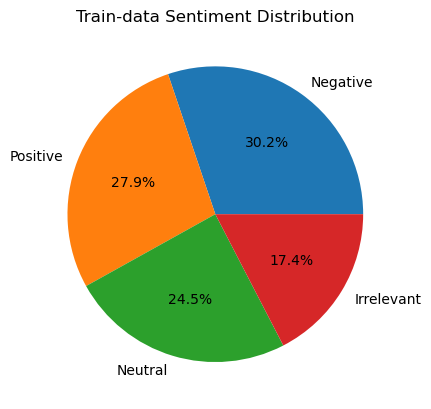

In [12]:
plt.pie(sentiment_counts,labels=sentiment_counts.index,autopct='%1.1f%%')
plt.title('Train-data Sentiment Distribution')
plt.show()

In [13]:
sentiment_counts=test.Sentiment.value_counts()
sentiment_counts

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

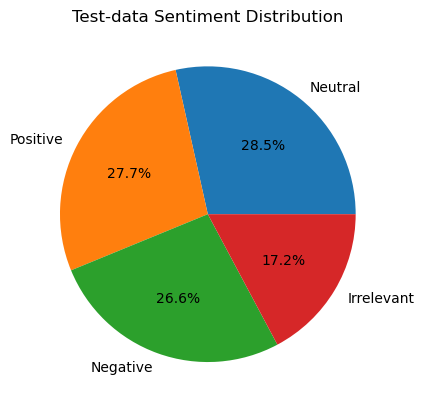

In [14]:
plt.pie(sentiment_counts,labels=sentiment_counts.index,autopct='%1.1f%%')
plt.title('Test-data Sentiment Distribution')
plt.show()

Text(0.5, 0.98, 'Train-data Histogram number of words in reviews')

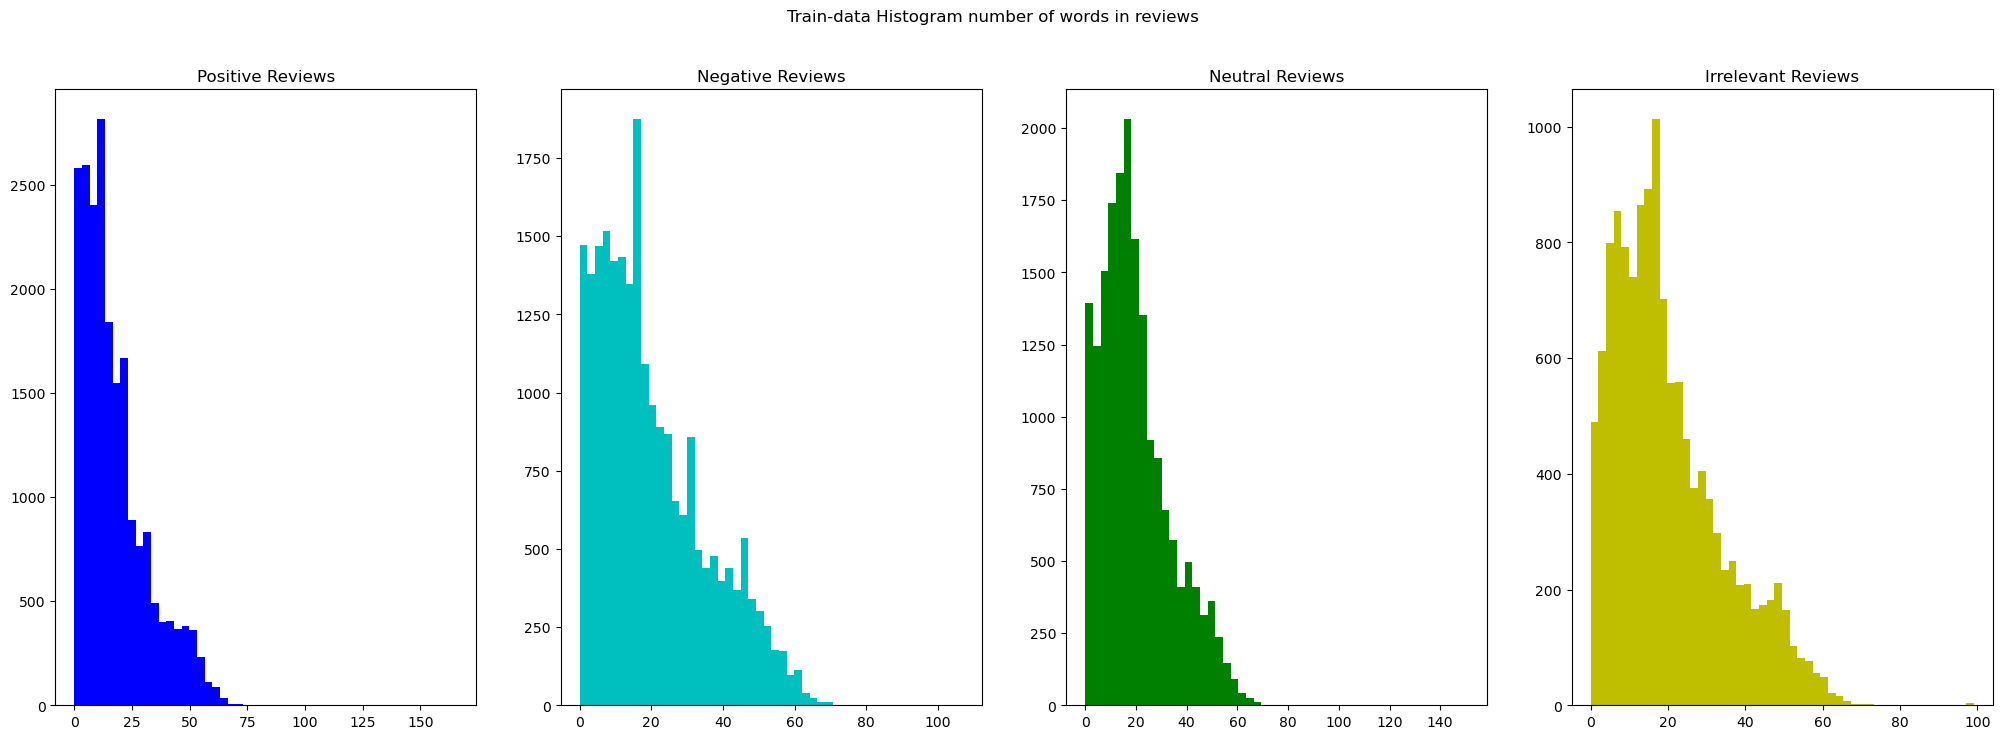

In [15]:
train.Sentiment=train.Sentiment.astype('string')
f,(a1,a2,a3,a4)=plt.subplots(1,4,figsize=(25,8))
a1.hist(train[train.Sentiment=='Positive']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='b')
a1.set_title('Positive Reviews')
a2.hist(train[train.Sentiment=='Negative']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='c')
a2.set_title('Negative Reviews')
a3.hist(train[train.Sentiment=='Neutral']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='g')
a3.set_title('Neutral Reviews')
a4.hist(train[train.Sentiment=='Irrelevant']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='y')
a4.set_title('Irrelevant Reviews') 
f.suptitle('Train-data Histogram number of words in reviews')

Text(0.5, 0.98, 'Test-data Histogram number of words in reviews')

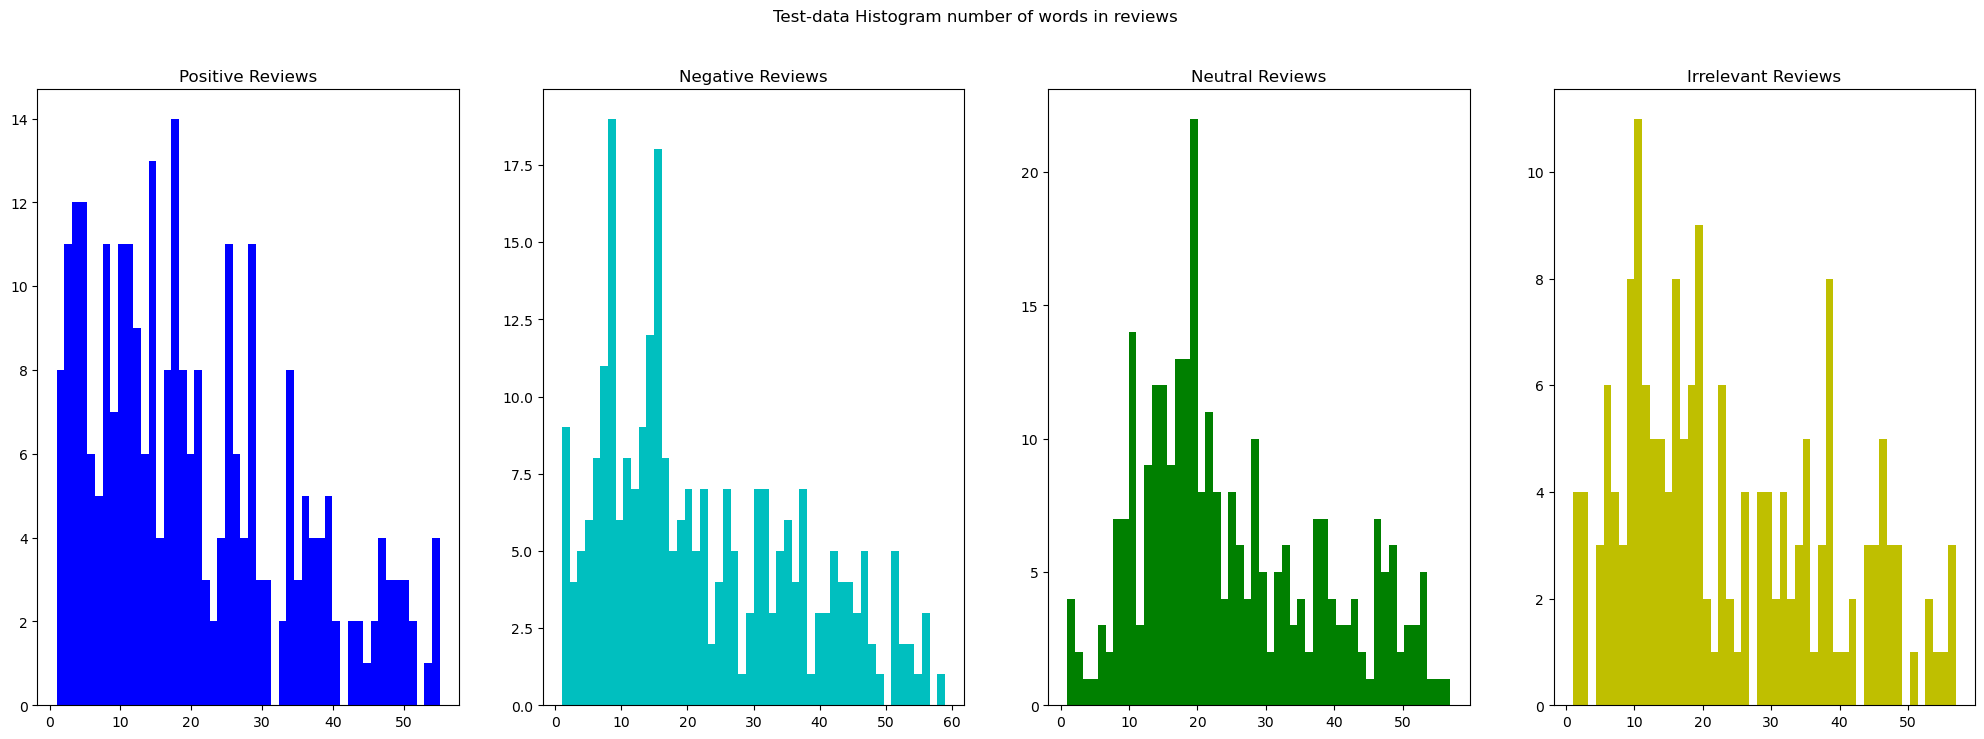

In [16]:
test.Sentiment=test.Sentiment.astype('string')
f,(a1,a2,a3,a4)=plt.subplots(1,4,figsize=(25,8))
a1.hist(test[test.Sentiment=='Positive']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='b')
a1.set_title('Positive Reviews')
a2.hist(test[test.Sentiment=='Negative']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='c')
a2.set_title('Negative Reviews')
a3.hist(test[test.Sentiment=='Neutral']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='g')
a3.set_title('Neutral Reviews')
a4.hist(test[test.Sentiment=='Irrelevant']['Tweet'].str.split().map(lambda x: len(x)),bins=50,color='y')
a4.set_title('Irrelevant Reviews') 
f.suptitle('Test-data Histogram number of words in reviews')

## Plotting features

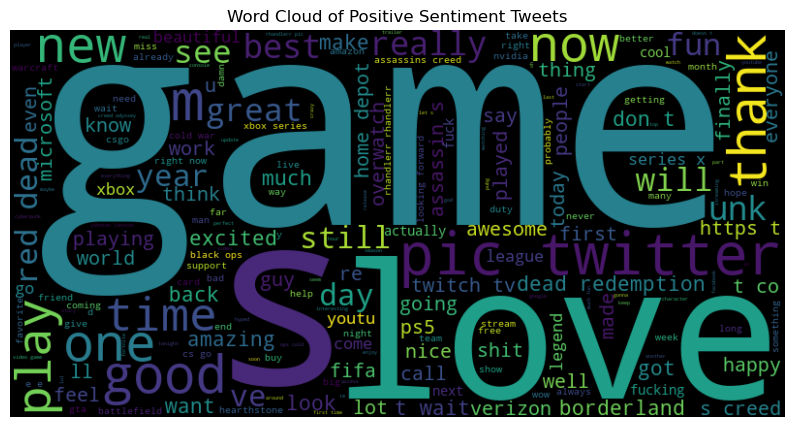

In [17]:
positive_tweets=train[train.Sentiment=='Positive']['Tweet']
positive_text=' '.join(positive_tweets)
wordcloud=WordCloud(width=800,height=400).generate(positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Tweets')
plt.show()

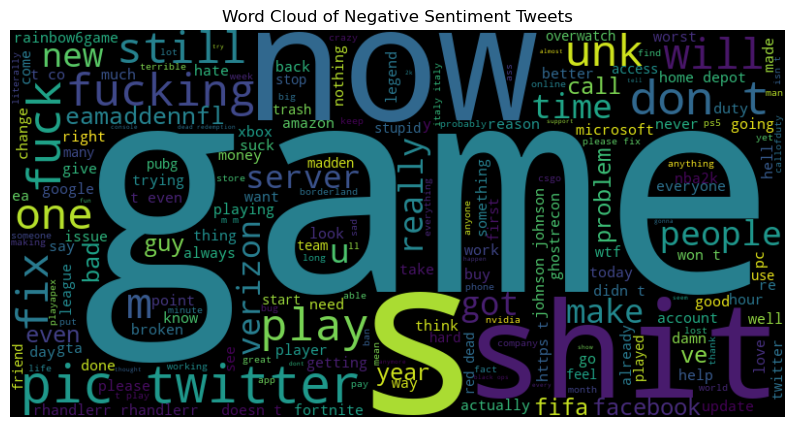

In [18]:
negative_tweets=train[train.Sentiment=='Negative']['Tweet']
negative_text=' '.join(negative_tweets)
wordcloud=WordCloud(width=800,height=400).generate(negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Tweets')
plt.show()

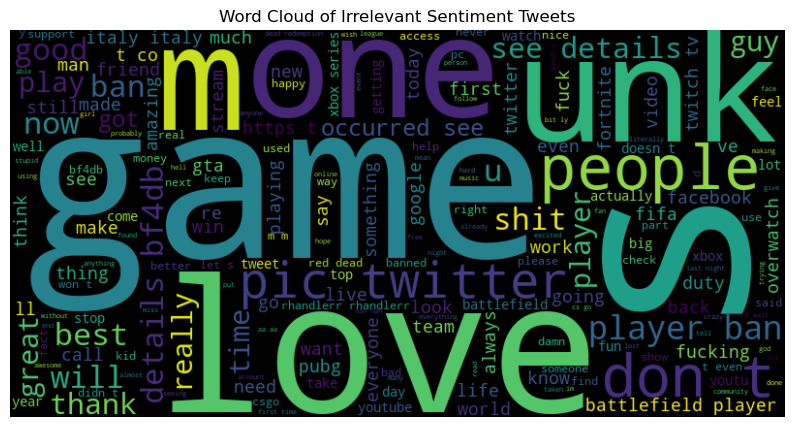

In [19]:
irrelevant_tweets=train[train.Sentiment=='Irrelevant']['Tweet']
irrelevant_text=' '.join(irrelevant_tweets)
wordcloud=WordCloud(width=800,height=400).generate(irrelevant_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Irrelevant Sentiment Tweets')
plt.show()

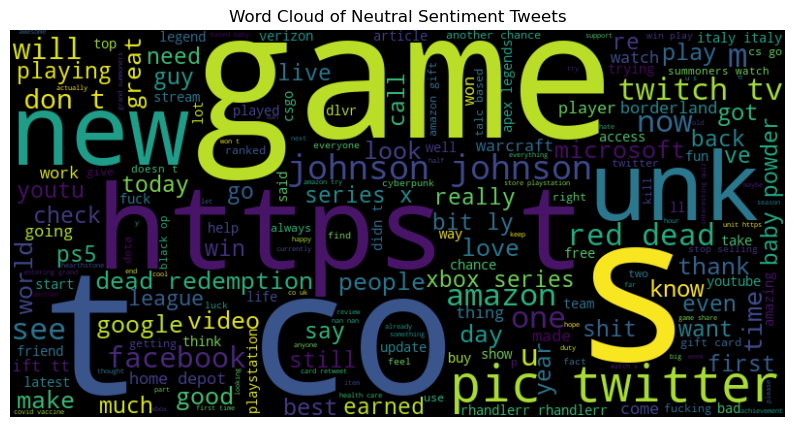

In [20]:
neutral_tweets=train[train.Sentiment=='Neutral']['Tweet']
neutral_text=' '.join(neutral_tweets)
wordcloud=WordCloud(width=800,height=400).generate(neutral_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment Tweets')
plt.show()

In [21]:
entity_counts=train.Entity.value_counts()
entity_counts

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [22]:
top_names=entity_counts.head(19)
other=entity_counts[19:].sum()
top_names['Other']=other
top_names

TomClancysRainbowSix          2400
MaddenNFL                     2400
Microsoft                     2400
LeagueOfLegends               2394
CallOfDuty                    2394
Verizon                       2382
CallOfDutyBlackopsColdWar     2376
ApexLegends                   2376
Facebook                      2370
WorldOfCraft                  2364
Dota2                         2364
NBA2K                         2352
TomClancysGhostRecon          2346
Battlefield                   2346
FIFA                          2340
Xbox(Xseries)                 2334
Overwatch                     2334
johnson&johnson               2328
Amazon                        2316
Other                        29766
Name: Entity, dtype: int64

In [23]:
percentages=(top_names/top_names.sum())*100
percentages

TomClancysRainbowSix          3.213626
MaddenNFL                     3.213626
Microsoft                     3.213626
LeagueOfLegends               3.205592
CallOfDuty                    3.205592
Verizon                       3.189524
CallOfDutyBlackopsColdWar     3.181490
ApexLegends                   3.181490
Facebook                      3.173455
WorldOfCraft                  3.165421
Dota2                         3.165421
NBA2K                         3.149353
TomClancysGhostRecon          3.141319
Battlefield                   3.141319
FIFA                          3.133285
Xbox(Xseries)                 3.125251
Overwatch                     3.125251
johnson&johnson               3.117217
Amazon                        3.101149
Other                        39.856994
Name: Entity, dtype: float64

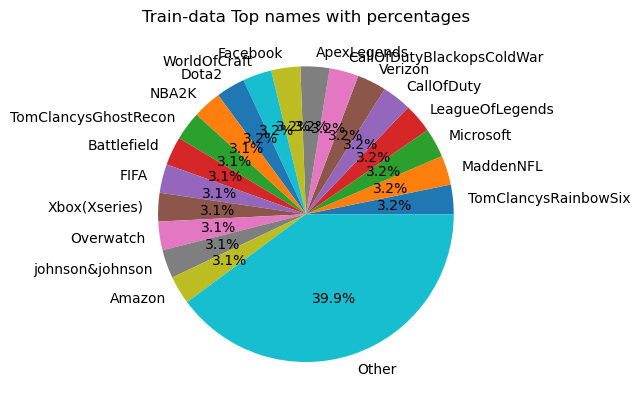

In [24]:
plt.pie(percentages,labels=percentages.index,autopct='%1.1f%%')
plt.title('Train-data Top names with percentages')
plt.show()

In [25]:
entity_counts=test.Entity.value_counts()
entity_counts

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [26]:
top_names=entity_counts.head(19)
other=entity_counts[19:].sum()
top_names['Other']=other
top_names

RedDeadRedemption(RDR)                40
johnson&johnson                       39
FIFA                                  38
PlayerUnknownsBattlegrounds(PUBG)     38
LeagueOfLegends                       37
ApexLegends                           36
TomClancysRainbowSix                  35
Nvidia                                35
GrandTheftAuto(GTA)                   35
Amazon                                34
Fortnite                              34
Facebook                              33
PlayStation5(PS5)                     33
AssassinsCreed                        33
Borderlands                           33
Overwatch                             32
Hearthstone                           32
Verizon                               32
CS-GO                                 32
Other                                339
Name: Entity, dtype: int64

In [27]:
percentages=(top_names/top_names.sum())*100
percentages

RedDeadRedemption(RDR)                4.0
johnson&johnson                       3.9
FIFA                                  3.8
PlayerUnknownsBattlegrounds(PUBG)     3.8
LeagueOfLegends                       3.7
ApexLegends                           3.6
TomClancysRainbowSix                  3.5
Nvidia                                3.5
GrandTheftAuto(GTA)                   3.5
Amazon                                3.4
Fortnite                              3.4
Facebook                              3.3
PlayStation5(PS5)                     3.3
AssassinsCreed                        3.3
Borderlands                           3.3
Overwatch                             3.2
Hearthstone                           3.2
Verizon                               3.2
CS-GO                                 3.2
Other                                33.9
Name: Entity, dtype: float64

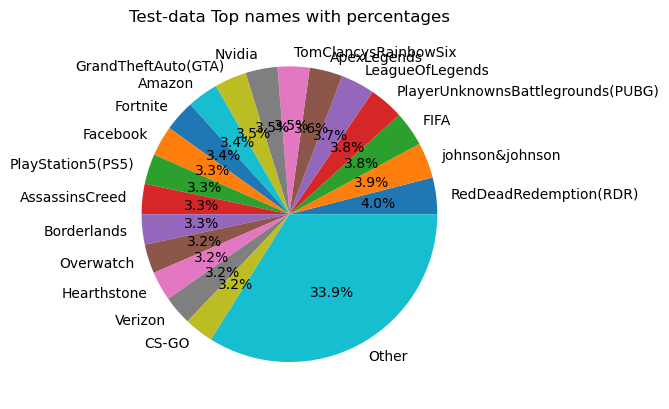

In [28]:
plt.pie(percentages,labels=percentages.index,autopct='%1.1f%%')
plt.title('Test-data Top names with percentages')
plt.show()

### Count information per category

In [29]:
plot1=train.groupby(by=["Entity","Sentiment"]).count().reset_index()
plot1.head()

,Entity,Sentiment,ID,Tweet
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192


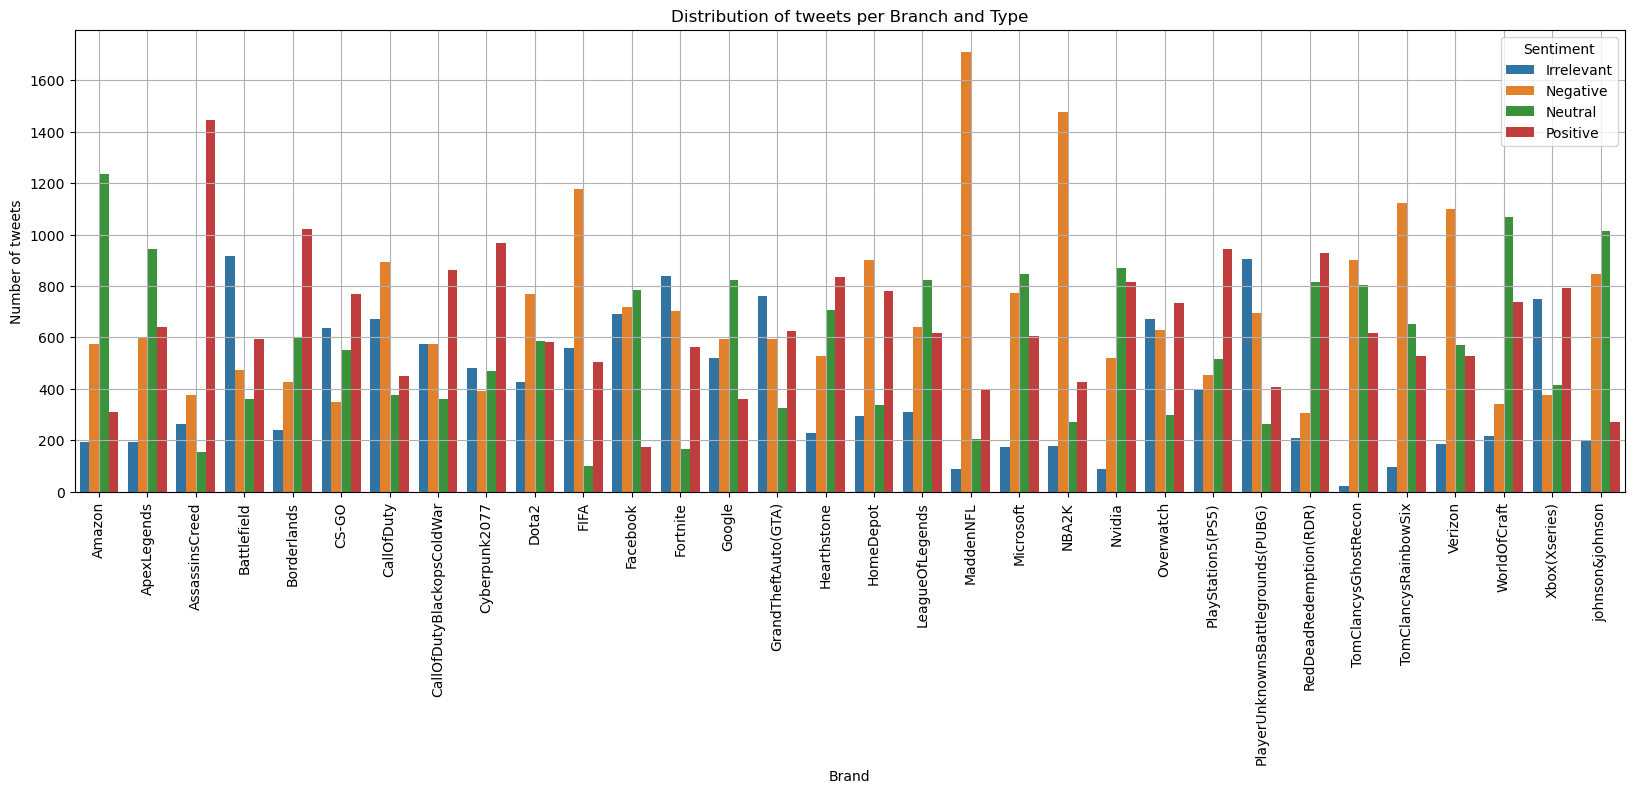

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Entity",y="ID",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

### Text analysis

In [31]:
from nltk import word_tokenize
tokens_text = [word_tokenize(str(word)) for word in train.Tweet]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


* There are more than 30 thousand unique words

In [32]:
" ".join(tokens_text[1])

'i am coming to the borders and i will kill you all'

In [33]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
" ".join(stop_words)

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

## Building Logistic Regression Model

In [34]:
bow=CountVectorizer(tokenizer=word_tokenize,stop_words=stop_words,ngram_range=(1,1))

#### Splitting the data into train and test

In [35]:
reviews_train, reviews_test = train_test_split(train, test_size=0.2, random_state=0)

In [36]:
#Creation of encoding related to train dataset
X_train = bow.fit_transform(reviews_train.Tweet)
#Transformation of test dataset with train encoding
X_test = bow.transform(reviews_test.Tweet)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [37]:
X_test

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [38]:
y_train = reviews_train.Sentiment
y_test = reviews_test.Sentiment

In [39]:
# registers per category
y_test.value_counts()/y_test.shape[0]

Negative       0.29919
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: Sentiment, dtype: Float64

In [40]:
# Logistic Regression
model1=LogisticRegression(C=1,solver='liblinear',max_iter=200)
model1.fit(X_train,y_train)
#prediction
pred=model1.predict(X_test)
score=accuracy_score(y_test,pred)
print("Accuracy: ",score*100)

Accuracy:  81.50900448550578


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
# Validation data
X_val=bow.transform(test.Tweet)
y_val=test.Sentiment

In [42]:
X_val

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [43]:
val_pred=model1.predict(X_val)
val_score=accuracy_score(y_val,val_pred)
print("Accuracy: ",val_score*100)

Accuracy:  91.7


* Another bag of words with n-gram of 4 while not classifying the stopwords using all the available information

In [44]:
bow=CountVectorizer(tokenizer=word_tokenize,ngram_range=(1,4))
X_train=bow.fit_transform(reviews_train.Tweet)
X_test=bow.transform(reviews_test.Tweet)
X_val=bow.transform(test.Tweet)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
X_train

<59745x1427378 sparse matrix of type '<class 'numpy.int64'>'
	with 4142213 stored elements in Compressed Sparse Row format>

In [46]:
# Logistic Regression
model2=LogisticRegression(C=0.9,solver='liblinear',max_iter=1500)
model2.fit(X_train,y_train)
#prediction
pred2=model2.predict(X_test)
score2=accuracy_score(y_test,pred2)
print("Accuracy: ",score2*100)

Accuracy:  90.80136573609158


In [48]:
val_pred2=model2.predict(X_val)
val_score2=accuracy_score(y_val,val_pred2)
print("Accuracy: ",val_score2*100)

Accuracy:  98.6


* We obtained a 90% accuracy on the test dataset